In [1]:
import pandas as pd
from collections import Counter
import os

In [2]:
df = pd.read_csv('merged_Friday.csv')

In [3]:
# Separate normal and non-normal instances
normal_traffic = df[df[' Label'] == 'BENIGN']  # Assuming 'benign' corresponds to normal traffic
non_normal_traffic = df[df[' Label'] != 'BENIGN']

# Randomly select 20000 instances from normal traffic
downsampled_normal_traffic = normal_traffic.sample(n=10000, random_state=42)

# Combine downsampled normal traffic with non-normal traffic
downsampled_df = pd.concat([downsampled_normal_traffic, non_normal_traffic])

# Shuffle the combined DataFrame
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
# Divide each value in the 'Fwd Packet Length Mean' column by the corresponding value in the 'Total Fwd Packets' column
downsampled_df['Fwd Packets Normalized'] = (downsampled_df[' Fwd Packet Length Mean'] / downsampled_df[' Total Fwd Packets']).round(3)

downsampled_df['Bwd Packets Normalized'] = (downsampled_df[' Bwd Packet Length Mean'] / downsampled_df[' Total Backward Packets']).round(3)

In [5]:
# Find the maximum value in a column
maximum_value = downsampled_df['Fwd Packets Normalized'].max()

# Find the minimum value in a column
minimum_value = downsampled_df['Fwd Packets Normalized'].min()

# Print the maximum and minimum values
print("Maximum Value:", maximum_value)
print("Minimum Value:", minimum_value)

Maximum Value: 1448.0
Minimum Value: 0.0


In [6]:
# Find the maximum value in a column
maximum_value = downsampled_df['Bwd Packets Normalized'].max()

# Find the minimum value in a column
minimum_value = downsampled_df['Bwd Packets Normalized'].min()

# Print the maximum and minimum values
print("Maximum Value:", maximum_value)
print("Minimum Value:", minimum_value)

Maximum Value: 2900.25
Minimum Value: 0.0


In [7]:
downsampled_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Fwd Packets Normalized,Bwd Packets Normalized
0,172.16.0.1-192.168.10.50-54891-80-6,172.16.0.1,54891,192.168.10.50,80,6,7/7/2017 3:58,72158382,8,6,...,0.0,2976.0,2976.0,36000000.0,43500000.0,66800000.0,5244854.0,DDoS,0.875,322.250
1,172.16.0.1-192.168.10.50-56992-6788-6,172.16.0.1,56992,192.168.10.50,6788,6,7/7/2017 2:54,79,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan,0.000,6.000
2,172.16.0.1-192.168.10.50-25760-80-6,172.16.0.1,25760,192.168.10.50,80,6,7/7/2017 4:04,10652759,4,0,...,0.0,4.0,4.0,10700000.0,0.0,10700000.0,10700000.0,DDoS,1.500,NaN
3,172.16.0.1-192.168.10.50-57592-800-6,172.16.0.1,57592,192.168.10.50,800,6,7/7/2017 2:55,97,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan,0.000,6.000
4,172.16.0.1-192.168.10.50-41041-5102-6,172.16.0.1,41041,192.168.10.50,5102,6,7/7/2017 3:23,31,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan,2.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298918,172.16.0.1-192.168.10.50-63214-80-6,172.16.0.1,63214,192.168.10.50,80,6,7/7/2017 4:13,396234,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,2.889,322.250
298919,172.16.0.1-192.168.10.50-45282-5009-6,172.16.0.1,45282,192.168.10.50,5009,6,7/7/2017 2:55,47,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan,0.000,6.000
298920,172.16.0.1-192.168.10.50-49660-80-6,172.16.0.1,49660,192.168.10.50,80,6,7/7/2017 4:15,11129677,6,0,...,0.0,1994.0,1994.0,11100000.0,0.0,11100000.0,11100000.0,DDoS,1.000,NaN
298921,172.16.0.1-192.168.10.50-62959-88-6,172.16.0.1,62959,192.168.10.50,88,6,7/7/2017 2:51,80,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan,2.000,6.000


In [8]:
import numpy as np
# Define ranges for categorization
category_ranges = {
    'Fwd_low': (0, 1000.00),
    'Fwd_medium': (1001.00, 2000.00),
    'Fwd_high': (2001.00, 3000.00),
    'Fwd_very_high': (3001.00, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'fwd_low'  # Treat NaN values as 'low'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Fwd Packets Normalized' column
downsampled_df['Fwd Packets Category'] = downsampled_df['Fwd Packets Normalized'].apply(lambda x: categorize_value(x, category_ranges))

In [9]:
import numpy as np
# Define ranges for categorization
category_ranges = {
    'Bwd_low': (0, 1000.00),
    'Bwd_medium': (1001.00, 2000.00),
    'Bwd_high': (2001.00, 3000.00),
    'Bwd_very_high': (3001.00, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'Bwd_low'  # Treat NaN values as 'low'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Bwd Packets Normalized' column
downsampled_df['Bwd Packets Category'] = downsampled_df['Bwd Packets Normalized'].apply(lambda x: categorize_value(x, category_ranges))

In [10]:
# Find the maximum value in a column
maximum_value = downsampled_df[' Flow Duration'].max()

# Find the minimum value in a column
minimum_value = downsampled_df[' Flow Duration'].min()

# Print the maximum and minimum values
print("Maximum Value:", maximum_value)
print("Minimum Value:", minimum_value)

Maximum Value: 119999902
Minimum Value: 0


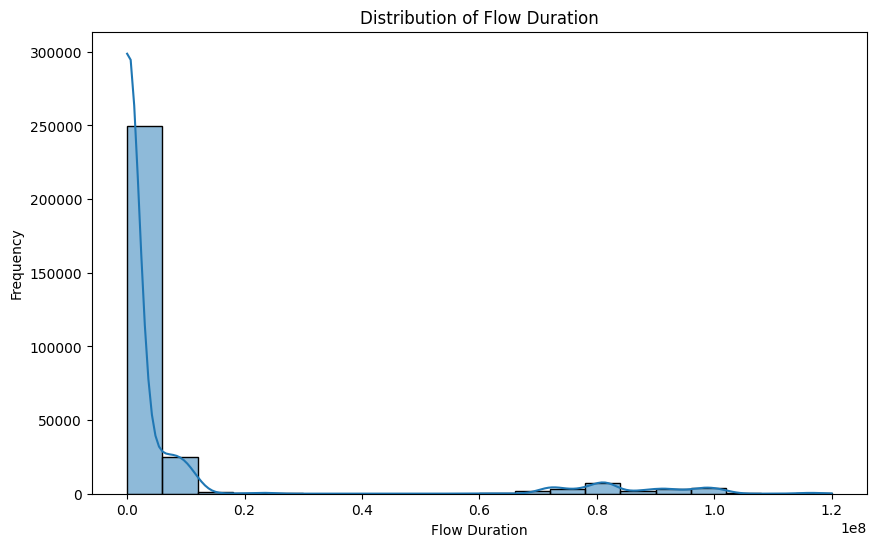

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of bins (ranges) for the histogram
num_bins = 20  # You can adjust this based on your preference

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(downsampled_df[' Flow Duration'], bins=num_bins, kde=True)
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [12]:
import numpy as np

# Define bin edges starting from 0
bin_edges = np.linspace(0, downsampled_df[' Flow Duration'].max(), num_bins + 1)

# Discretize 'Flow Duration' into bins
downsampled_df['Flow Duration Bin'] = pd.cut(downsampled_df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = downsampled_df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                      BENIGN   Bot   DDoS  PortScan
Flow Duration Bin                                        
(0.0, 5999995.1]              8120  1954  80841    158487
(5999995.1, 11999990.2]        386     0  24262        67
(11999990.2, 17999985.3]        98     0    938         1
(17999985.3, 23999980.4]        44     0    347        71
(23999980.4, 29999975.5]        20     0    138         1
(29999975.5, 35999970.6]        49     0     13         1
(35999970.6, 41999965.7]        28     0      0        59
(41999965.7, 47999960.8]        43     0     14         0
(47999960.8, 53999955.9]        18     0      0         0
(53999955.9, 59999951.0]        24     0     14        47
(59999951.0, 65999946.1]       190     2      0         0
(65999946.1, 71999941.2]        70     0   1569         0
(71999941.2, 77999936.3]        76     0   3367        29
(77999936.3, 83999931.4]        72     0   7230         0
(83999931.4, 89999926.5]        34     0   2057         0
(89999926.5, 9

In [13]:
import numpy as np
# Define ranges for categorization
ranges = {
    '0_750': (0.0, 750.0),
    '751_1500': (750.0, 1500.0),
    '1501_15000': (1500.0, 15000.0),
    '15001_120000': (15000.0, 120000.0),
    '120001_300000': (120000.0, 300000.0),
    '300001_6000000': (300000.0, 6000000.0),
    '6000001_65999946': (6000000.0, 65999946.0),
    '66000000_119999902': (65999946.0, 119999902.0),
    '119999902_infinity': (119999902.0, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'unknown'  # Treat NaN values as 'unknown'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Flow Duration' column
downsampled_df['Flow Duration Category'] = downsampled_df[' Flow Duration'].apply(lambda x: categorize_value(x, ranges))


In [14]:
# Get the number of unique items in each column
unique_counts = downsampled_df.nunique()
print("Unique value count for each feature")
# Print header names with the number of unique items
for column_name, count in unique_counts.items():
    print(f"{column_name}: {count} unique items")

print("\nDataframe Sample")


Unique value count for each feature
Flow ID: 213779 unique items
 Source IP: 911 unique items
 Source Port: 49864 unique items
 Destination IP: 1660 unique items
 Destination Port: 3808 unique items
 Protocol: 3 unique items
 Timestamp: 482 unique items
 Flow Duration: 132939 unique items
 Total Fwd Packets: 145 unique items
 Total Backward Packets: 160 unique items
Total Length of Fwd Packets: 1443 unique items
 Total Length of Bwd Packets: 1834 unique items
 Fwd Packet Length Max: 896 unique items
 Fwd Packet Length Min: 101 unique items
 Fwd Packet Length Mean: 1804 unique items
 Fwd Packet Length Std: 2005 unique items
Bwd Packet Length Max: 860 unique items
 Bwd Packet Length Min: 277 unique items
 Bwd Packet Length Mean: 1989 unique items
 Bwd Packet Length Std: 1951 unique items
Flow Bytes/s: 136513 unique items
 Flow Packets/s: 135627 unique items
 Flow IAT Mean: 135214 unique items
 Flow IAT Std: 114099 unique items
 Flow IAT Max: 102279 unique items
 Flow IAT Min: 2636 unique

In [15]:
essential_columns = [' Source IP', ' Destination IP',' Destination Port', ' Protocol', 'Fwd Packets Category', 'Bwd Packets Category', 'Flow Duration Category']

In [16]:
# Drop non-essential columns
filtered_df = downsampled_df[essential_columns]
print("\nFiltered dataset Summery")
print(filtered_df.info())


Filtered dataset Summery
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298923 entries, 0 to 298922
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0    Source IP              298923 non-null  object
 1    Destination IP         298923 non-null  object
 2    Destination Port       298923 non-null  int64 
 3    Protocol               298923 non-null  int64 
 4   Fwd Packets Category    298923 non-null  object
 5   Bwd Packets Category    298923 non-null  object
 6   Flow Duration Category  298923 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB
None


In [17]:
# Function to convert IP addresses to first subnet
def convert_to_first_subnet(ip_address):
    octets = ip_address.split('.')
    octets[2] = '0'
    octets[3] = '0'
    return '.'.join(octets)


# Strip leading and trailing spaces from 'Source IP' and 'Destination IP' columns
filtered_df[' Source IP'] = filtered_df[' Source IP'].astype(str).str.strip()
filtered_df[' Destination IP'] = filtered_df[' Destination IP'].astype(str).str.strip()

# Apply the function to 'Source IP' and 'Destination IP' columns
filtered_df[' Source IP'] = filtered_df[' Source IP'].apply(convert_to_first_subnet)
filtered_df[' Destination IP'] = filtered_df[' Destination IP'].apply(convert_to_first_subnet)

# Check the first few rows of the DataFrame to verify the changes
print("\nFiltered dataset after clearing subnets for first 2 octets")
print(filtered_df.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3081164310.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[' Source IP'] = filtered_df[' Source IP'].astype(str).str.strip()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3081164310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[' Destination IP'] = filtered_df[' Destination IP'].astype(str).str.strip()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3081164310.py:14: SettingWithCopyWarning: 
A value is trying to be set on 


Filtered dataset after clearing subnets for first 2 octets
    Source IP  Destination IP   Destination Port   Protocol  \
0  172.16.0.0     192.168.0.0                 80          6   
1  172.16.0.0     192.168.0.0               6788          6   
2  172.16.0.0     192.168.0.0                 80          6   
3  172.16.0.0     192.168.0.0                800          6   
4  172.16.0.0     192.168.0.0               5102          6   

  Fwd Packets Category Bwd Packets Category Flow Duration Category  
0              Fwd_low              Bwd_low     66000000_119999902  
1              Fwd_low              Bwd_low                  0_750  
2              Fwd_low              Bwd_low       6000001_65999946  
3              Fwd_low              Bwd_low                  0_750  
4              Fwd_low              Bwd_low                  0_750  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3081164310.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[' Destination IP'] = filtered_df[' Destination IP'].apply(convert_to_first_subnet)


In [18]:
with_ID = filtered_df.copy()
with_ID.insert(0, 'alertID', range(len(with_ID)))
print("\nAdding a ID number for the records")
print(with_ID.head())

dataset_with_ID = with_ID.values.tolist()


Adding a ID number for the records
   alertID   Source IP  Destination IP   Destination Port   Protocol  \
0        0  172.16.0.0     192.168.0.0                 80          6   
1        1  172.16.0.0     192.168.0.0               6788          6   
2        2  172.16.0.0     192.168.0.0                 80          6   
3        3  172.16.0.0     192.168.0.0                800          6   
4        4  172.16.0.0     192.168.0.0               5102          6   

  Fwd Packets Category Bwd Packets Category Flow Duration Category  
0              Fwd_low              Bwd_low     66000000_119999902  
1              Fwd_low              Bwd_low                  0_750  
2              Fwd_low              Bwd_low       6000001_65999946  
3              Fwd_low              Bwd_low                  0_750  
4              Fwd_low              Bwd_low                  0_750  


In [19]:
print("\nconverting the dataset in to a list")
dataset = [alert[1:] for alert in dataset_with_ID]


converting the dataset in to a list


In [20]:
# Convert each sublist to a tuple for hashability
data_tuples = [tuple(sublist) for sublist in dataset]

# Count occurrences of each unique record
record_counts = Counter(data_tuples)

print("\nnumber occurrences of each unique record")
print(f"{len(record_counts) }")


number occurrences of each unique record
5670


In [21]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame with categorical values

# Initialize dictionaries to store both forward and reverse mappings
forward_mapping = {}
reverse_mapping = {}

# Initialize the global counter to keep track of numerical values
global_counter = 0

# Iterate over each column in the DataFrame
for column in filtered_df.columns:
    # Initialize a local counter for each column
    local_counter = 0
    
    # Initialize dictionaries for forward and reverse mappings for the current column
    forward_mapping[column] = {}
    reverse_mapping[column] = {}
    
    # Iterate over each unique value in the current column
    for value in filtered_df[column].unique():
        # Map each unique value to a numerical value based on the global counter
        forward_mapping[column][value] = global_counter + local_counter
        reverse_mapping[column][global_counter + local_counter] = value
        
        # Increment the local counter
        local_counter += 1
        
    # Update the global counter to continue numbering from the last value of the previous dictionary
    global_counter += local_counter

# Create a new DataFrame with mapped values
new_df = pd.DataFrame()

# Iterate over each column in the original DataFrame and fill in values in the new DataFrame
for column in filtered_df.columns:
    new_df[column] = filtered_df[column].map(forward_mapping[column])

# Display the DataFrame with numerical values
print(new_df)

# Display forward and reverse mappings for each column
for column in new_df.columns:
    print(f"For {column}:")
    print("Forward Mapping:", forward_mapping[column])
    print("Reverse Mapping:", reverse_mapping[column])
    print()


         Source IP   Destination IP   Destination Port   Protocol  \
0                0              384               1024       4832   
1                0              384               1025       4832   
2                0              384               1024       4832   
3                0              384               1026       4832   
4                0              384               1027       4832   
...            ...              ...                ...        ...   
298918           0              384               1024       4832   
298919           0              384               2086       4832   
298920           0              384               1024       4832   
298921           0              384               1738       4832   
298922           0              384               1024       4832   

        Fwd Packets Category  Bwd Packets Category  Flow Duration Category  
0                       4835                  4837                    4840  
1                

In [22]:
# Calculate the count of unique values in the 'type' field
type_counts = downsampled_df[' Label'].value_counts()

print("\nDisplay the count of unique values in Label")
print(type_counts)


Display the count of unique values in Label
 Label
PortScan    158930
DDoS        128027
BENIGN       10000
Bot           1966
Name: count, dtype: int64


In [23]:
combined_dict = {k: v for inner_dict in reverse_mapping.values() for k, v in inner_dict.items()}

item_dataset = [tuple(x) for x in new_df.to_records(index=False)]

# Add ID field to the start of each tuple
item_dataset_withID = [(i,) + record for i, record in enumerate(item_dataset)]

new_df.to_csv('data.txt', index=False, sep=' ', header=False)

In [24]:
# Run the algorithm

os.system("java -jar spmf.jar run FPMax data.txt output.txt 1%")

itemset_records_object = []
itemset_records_numbers = []

# Read the output file line by line
outFile = open("output.txt", 'r', encoding='utf-8')
for string in outFile:
    itemset = []
    parts = string.split('#SUP:')
    numbers = list(map(int, parts[0].split()))
    support_count = int(parts[1].strip())

    itemset_using_numbers = [numbers, support_count]
    itemset_records_numbers.append(itemset_using_numbers)

    # Translate numerical values to attribute names using reverse mapping
    attribute_names = [str(combined_dict[num]) for num in numbers]
    itemset = [attribute_names, support_count]
    # Output the result
    #print(f"Pattern: {' '.join(attribute_names)}, Support Count: {str(support_count)}")
    itemset_records_object.append(itemset)

outFile.close()

def return_unique_labels(alertID_List):
    # Filter DataFrame based on selected IDs
    selected_records = downsampled_df.iloc[alertID_List]
    # Count unique values in a certain field (e.g., Field1) in the selected records
    unique_value_counts = selected_records[' Label'].value_counts().to_dict()
    return(unique_value_counts)

patterns_ID_list = []
pattern_label_list = []

for index,record in enumerate(itemset_records_numbers):
    itemset = record[0]
    containing_alerts = []
    for alert in item_dataset_withID:
        alert_items = set(alert[1:])  # Exclude the ID field
        if set(itemset).issubset(alert_items):
            containing_alerts.append(alert[0])  # Append the ID

    pattern_label_record = list(return_unique_labels(containing_alerts).items())
    patterns_ID_list.append((itemset_records_object[index][0],containing_alerts))
    pattern_label_list.append((itemset_records_object[index][0],pattern_label_record))
    print(f"Pattern {index}: {itemset_records_object[index][0]}, \n{pattern_label_record}\n===============================================================================================================")


Pattern 0: ['Fwd_low', 'Bwd_low', '192.168.0.0', '192.168.0.0', '17', '53'], 
[('BENIGN', 4342)]
Pattern 1: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0', '172.16.0.0', '80', '120001_300000'], 
[('DDoS', 6563), ('PortScan', 3)]
Pattern 2: ['Fwd_low', 'Bwd_low', '15001_120000', '192.168.0.0'], 
[('BENIGN', 2489), ('Bot', 617)]
Pattern 3: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0'], 
[('BENIGN', 4035), ('Bot', 1261), ('DDoS', 3)]
Pattern 4: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0', '172.16.0.0', '80', '15001_120000'], 
[('DDoS', 16542), ('PortScan', 34)]
Pattern 5: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0', '172.16.0.0', '80', '66000000_119999902'], 
[('DDoS', 21370)]
Pattern 6: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0', '172.16.0.0', '80', '6000001_65999946'], 
[('DDoS', 25720), ('PortScan', 29)]
Pattern 7: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0', '172.16.0.0', '80', '300001_6000000'], 
[('DDoS', 56867), ('PortScan', 28), ('BENIGN', 1)]
Pattern 8: ['Fwd_low', 'Bwd_low', '6', '192.168.0.0'

In [25]:
# Function to get the original field and value using the reverse mapping dictionaries
def get_field_and_value(item):
    for column, mapping in reverse_mapping.items():
        if int(item) in mapping:
            return str(column), mapping[int(item)]
    return None, None

In [26]:
# Initialize a list to store the patterns with original field and value

pattern_record = pd.DataFrame(columns=['Support Count', 'Label'])
patterns_with_fields = []

for index, record in enumerate(itemset_records_numbers):
    # Split the line into items and support count
    items = record[0]
    support_count = int(record[1])

    # Initialize a list to store the original field and value of each item
    record_with_field = []

    # Map each item in the pattern to its original field and value
    for item in items:
        # Get the field and value using the reverse mapping dictionaries
        field, value = get_field_and_value(item)
        record_with_field.append({"field": field, "value": value})

        # Check if the field already exists in the DataFrame
        if field not in pattern_record.columns:
            # If not, add a new column with the field name and fill with NaN
            pattern_record[field] = pd.NA
        
        # Add the value to the corresponding field
        pattern_record.at[index, field] = value
    
        # Add the support_count to the pattern_data dictionary
    pattern_record.at[index, 'Support Count'] = support_count

    if len(pattern_label_list[index][1]) == 1:
        pattern_record.at[index, 'Label'] = pattern_label_list[index][1][0][0]
    else:
        pattern_record.at[index, 'Label'] = 'Mixed Labels'
    # Store the pattern with original field and value along with the support count
    
    patterns_with_fields.append({"pattern": record_with_field, "support_count": support_count})

pattern_record = pattern_record.fillna('NaN').infer_objects(copy=False)

# Print the patterns with original field and value
for pattern_info in patterns_with_fields:
    print(pattern_info)
    print()


{'pattern': [{'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': ' Destination IP', 'value': '192.168.0.0'}, {'field': ' Source IP', 'value': '192.168.0.0'}, {'field': ' Protocol', 'value': 17}, {'field': ' Destination Port', 'value': 53}], 'support_count': 4342}

{'pattern': [{'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': ' Protocol', 'value': 6}, {'field': ' Destination IP', 'value': '192.168.0.0'}, {'field': ' Source IP', 'value': '172.16.0.0'}, {'field': ' Destination Port', 'value': 80}, {'field': 'Flow Duration Category', 'value': '120001_300000'}], 'support_count': 6566}

{'pattern': [{'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': 'Flow Duration Category', 'value': '15001_120000'}, {'field': ' Source IP', 'value': '192.168.0.0'}], 'support_count': 3106}

{'pattern': [{

In [27]:
# Save the pattern record DataFrame to a CSV file
pattern_record.to_csv('pattern_record_1%_Downsampled.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'pattern_record_1%_Downsampled.csv'